<div dir="rtl" align="center">
<font face="XB Zar" size=5>
    <font face="IranNastaliq" size=5>
      به نام خدا
    </font>
    <br>
    <font size=3>
      دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
    </font>
    <br>
    <font color=blue size=5>
      مقدمه‌ای بر یادگیری ماشین
    </font>
    <br>
    <hr/>
    <font color=red size=6>
      فصل سوم: یادگیری، ارزیابی و تنطیم کردن مدل ها
    </font>
    <hr/>
    <font color=red size=6>
      مبحث:‌ارزیابی مدل ها
    </font>
    <hr/>
    <br>
      نویسنده:‌علیرضا حیدری
    <hr>


<div dir=rtl id="Abstract">
<font face="XB Zar" size=4>
  <font color="red" size=5>
    روند کلی
  </font>
  <hr />
    در این نوتبوک با معیار های مختلف ارزیابی مدل ها در مسایل دسته بندی و رگرسیون آشنا می‌شویم
  <br/>
</font>
</div>


  <div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        آشنایی با دیتاست
      </font>
      <hr />
      دیتاست ای که در این بخش استفاده خواهد شد، دیتاست MNIST است.
      <br />
      </font>
    </div>

In [31]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [32]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X.shape

(70000, 784)

  <div dir=rtl id="dataset">

<font face="XB Zar" size=4>
      همانطورکه مشخص است،‌داده ها عکس های ۲۸ در ۲۸ هستند
      </font>
      </div>


In [33]:
y.shape

(70000,)

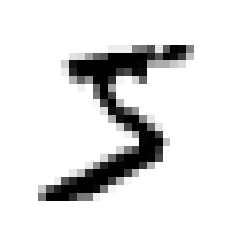

In [51]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
  

digit = X[0]
plot_digit(digit)

In [35]:
y[1401]

9

<div dir=rtl id="Abstract">
<font face="XB Zar" size=4>
  <font color="red" size=5>
    آموزش دادن یک Binary Classifier
  </font>
  <hr />
    در این بخش یک binary classifier که تشخیض می‌دهید یک عدد ۵ است یا نه را آموزش دهیم.
  <br/>
</font>
</div>

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [46]:
y_train_5

array([False, False, False, ..., False, False, False])

In [47]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [52]:
sgd_clf.predict([digit])

array([ True])

<div dir=rtl id="Abstract">
<font face="XB Zar" size=4>
  <font color="red" size=5>
    محاسبه دقت
  </font>
  <hr />
    دقت این classifier را با کمک از cross validation به دست می‌آوریم.

   <br/>
</font>
</div>

In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.96428571, 0.95247619, 0.9627619 , 0.964     , 0.93180952])

  <div dir=rtl id="dataset">

<font face="XB Zar" size=4>
    این مدل برای همه fold ها به دقت بالای ۹۳ درصد رسیده است! چقدر خوب!
      </font>
      </div>


  <div dir=rtl id="dataset">

<font face="XB Zar" size=4>
    قبل از اینکه خیلی هیجان زده شوید،‌بگذارید تا یک مدل بسیار ساده را آموزش دهیم تا دقت آن را بسنجیم.
      </font>
      </div>


  <div dir=rtl id="dataset">

<font face="XB Zar" size=4>
    این مدل به گونه ای کار می‌کند که هر عکسی ببیند، آن را دسته "غیر ۵" می‌گذارد
      </font>
      </div>


In [55]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [56]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.9107619 , 0.91047619, 0.90857143, 0.91304762, 0.90895238])

  <div dir=rtl id="dataset">

<font face="XB Zar" size=4>
خب همانطور که مشخص است این دسته بند، به دقت بالای ۹۰ درصد رسید! خیلی هم تعجب برانگیر نیست، زیرا حدود ۱۰ درصد از داده ها لیبل شان ۵ بوده است، و آن ها اشتباه تشخیص داده شده اند.
      </font>
      </div>


<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
بنابراین، accuracy همیشه یه متریک خوب برای ارزیابی مدل ها نیست.
      </font>
      </div>


<div dir=rtl id="Abstract">
<font face="XB Zar" size=4>
  <font color="red" size=5>
    Confusion Matrix
  </font>
  <hr />
    یک روش خیلی بهتر برای ارزیابی مدل،‌نگاه به confusion matrix است که به ما نشان می‌دهد که هر دسته چند بار در دسته درست و چند بار در دسته های اشتباه دسته بندی شده است

   <br/>
</font>
</div>

  <div dir=rtl id="dataset">

<font face="XB Zar" size=4>
    هر سطر در این ماترسی نشان دهنده کلاس واقعی و هر ستون نشان دهنده کلاسی است که مدل پیش‌بینی کرده است.
      </font>
      </div>


In [59]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

In [67]:
from sklearn.metrics import confusion_matrix

sgd_confusion_matrix = confusion_matrix(y_train_5, y_train_pred)
sgd_confusion_matrix

array([[46654,  1140],
       [ 1219,  3487]])

<div dir=rtl id="dataset">
<font face="XB Zar" size=4>
اطلاعاتی که confusion matrix از SGDClassifier به ما می‌دهد عبارت هستند از:
          <ul>
            <font face="Roboto">
              <li>
                اندیس [0,0]: ۴۶۶۵۴ عکسی که لیبل آن ها "غیر ۵" بوده است به درستی "غیر ۵" تشخیص داده شده اند.
              </li>
              <li>
                اندیس [0,1]: ۱۱۴۰ عکسی که لیبل آن ها "غیر ۵" بوده است به اشتباه "۵" تشخیص داده شده اند.
              </li>
              <li>
                اندیس [1,0]: ۱۲۱۹ عکسی که لیبل آن ها "۵" بوده است به اشتباه "غیر ۵" تشخیص داده شده اند.
              </li>
              <li>
                اندیس [1,1]: ۳۴۸۷ عکسی که لیبل آن ها "۵" بوده است به درستی "۵" تشخیص داده شده اند.
              </li>
            </font>
          </ul>
</font>
</div>


In [62]:
y_train_perfect_predictions = y_train_5 = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[47794,     0],
       [    0,  4706]])

<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
برای یک دسته بند ایده آل، خانه های غیر قطری confusion matrix همگی ۰ هستند.
</font>
      </div>


<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
همانطور که متوجه شده اید، confusion matrix اطلاعات زیادی به ما می‌دهد. یکی از آن ها، دقت پیش‌بینی های positive .است که به آن precision می‌گوییم
</font>
      </div>


<br><center>  $ Precision = \frac{TP}{TP + FP} $